In [1]:
import numpy as np
import pandas as pd


# for operation 2
df2 = pd.read_csv('diabetes.csv', na_values=['#NAME?'])

In [3]:
df1 = pd.read_csv('diabetes.csv', na_values=['#NAME?'])
df1.isnull().sum().sort_values(ascending=False)
df_no_missing = df1.dropna(axis=0)
print(df_no_missing.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
from sklearn.impute import SimpleImputer

# Data from excel
df1 = pd.read_csv('diabetes.csv', na_values=['#NAME?'])

#Imputer to replace Null with mean
imp = SimpleImputer(missing_values = np.nan, strategy='mean')


imp.fit(df1)
df1 = pd.DataFrame(data=imp.transform(df1), columns=df1.columns)

#print
print(df1.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [11]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [12]:
glucose_indices, glucose_values = find_outliers_tukey(df1['Glucose'])
print("Outliers for Glucose")
print(np.sort(glucose_values))

print("Outliers for Pregnancies")
pr_indices, pr_values = find_outliers_tukey(df1['Pregnancies'])
print(np.sort(pr_values))

print("Outliers for BloodPressure")
bp_indices, bp_values = find_outliers_tukey(df1['BloodPressure'])
print(np.sort(bp_values))


print("Outliers for SkinThickness")
st_indices, st_values = find_outliers_tukey(df1['SkinThickness'])
print(np.sort(st_values))

print("Outliers for Insulin")
in_indices, in_values = find_outliers_tukey(df1['Insulin'])
print(np.sort(in_values))

print("Outliers for BMI")
bmi_indices, bmi_values = find_outliers_tukey(df1['BMI'])
print(np.sort(bmi_values))

print("Outliers for DiabetesPedigreeFunction")
dpf_indices, dpf_values = find_outliers_tukey(df1['DiabetesPedigreeFunction'])
print(np.sort(dpf_values))

print("Outliers for Age")
age_indices, age_values = find_outliers_tukey(df1['Age'])
print(np.sort(age_values))

Outliers for Glucose
[0. 0. 0. 0. 0.]
Outliers for Pregnancies
[14. 14. 15. 17.]
Outliers for BloodPressure
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  24.  30.  30. 108. 108. 110. 110.
 110. 114. 122.]
Outliers for SkinThickness
[99.]
Outliers for Insulin
[321. 325. 325. 325. 326. 328. 330. 335. 342. 360. 370. 375. 387. 392.
 402. 415. 440. 465. 474. 478. 480. 480. 485. 495. 495. 510. 540. 543.
 545. 579. 600. 680. 744. 846.]
Outliers for BMI
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  52.3 52.3 52.9
 53.2 55.  57.3 59.4 67.1]
Outliers for DiabetesPedigreeFunction
[1.213 1.222 1.224 1.224 1.251 1.258 1.268 1.282 1.292 1.318 1.321 1.353
 1.39  1.391 1.394 1.4   1.441 1.461 1.476 1.6   1.698 1.699 1.731 1.781
 1.893 2.137 2.288 2.329 2.42 ]
Outliers for Age
[67. 67. 67. 68. 69. 69. 70. 72. 81.]


In [13]:
df_del = df1.drop(bp_indices)
print(df_del.head(5))
   

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [14]:
min_in = np.min(df_del['Insulin'])
df_del['Insulin'] = np.where(df_del['Insulin'] > 321, min_in, df_del['Insulin'])
print(df_del.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_del)

PCA(copy=True, n_components=2, whiten=False)

df = pca.transform(df_del)

df_2d = pd.DataFrame(df)

df_2d.index = df_del.index

df_2d.columns = ['PC1', 'PC2']

df_2d.head(5)

,PC1,PC2
0,-59.294167,-33.438004
1,-64.789829,31.729598
2,-59.264097,-65.068124
3,28.506351,36.255363
4,107.155460,-4.494640


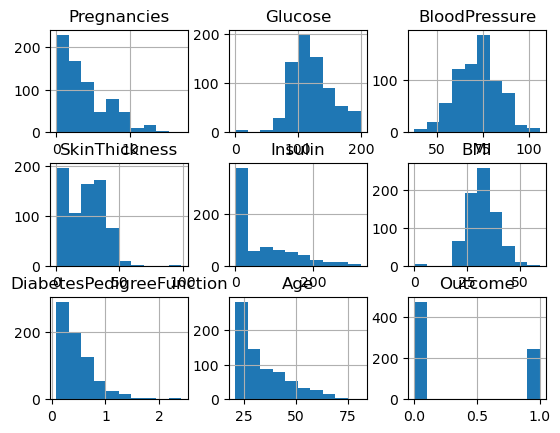

In [16]:
import matplotlib.pyplot as plt
df_del.hist()
plt.show()

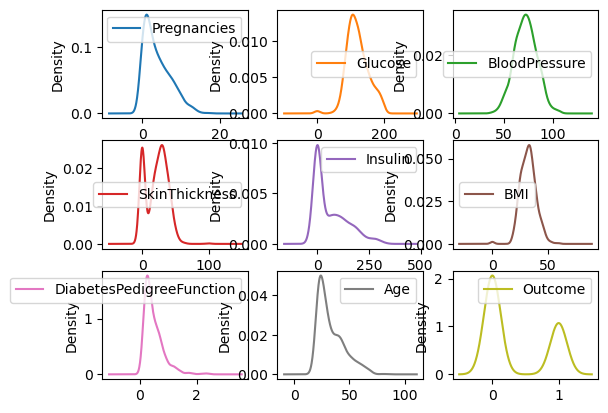

In [17]:
df_del.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

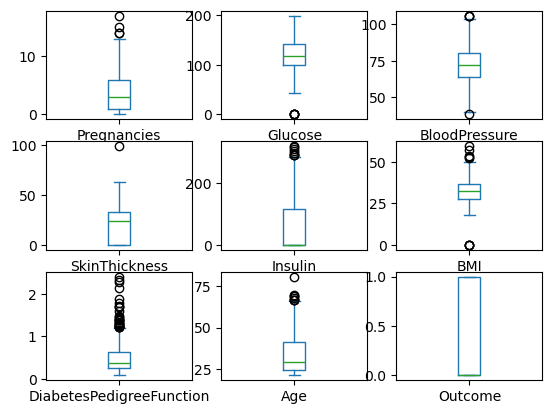

In [18]:
df_del.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

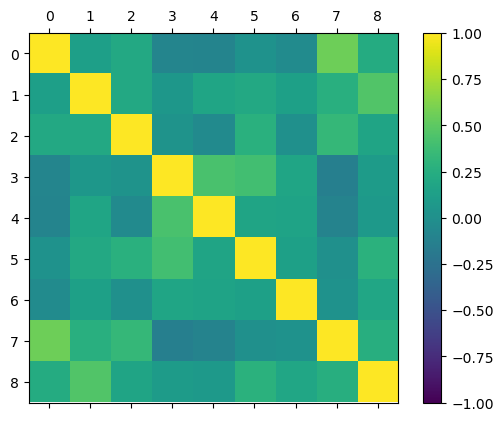

In [19]:
cor = df_del.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax =1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

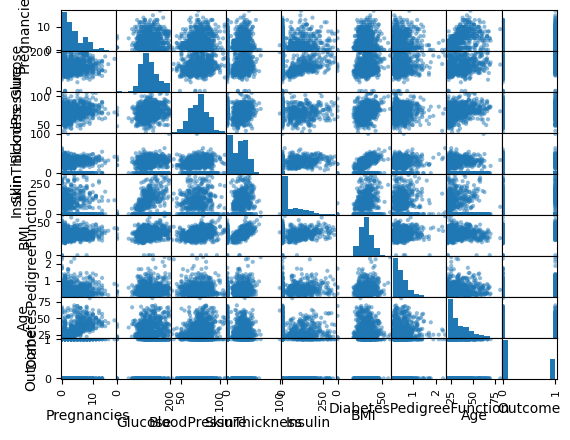

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_del)
plt.show()